In [7]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import itertools
import numpy as np
from matplotlib import pyplot as plt

In [10]:
uri = "localhost:27017"
client = MongoClient(uri, server_api=ServerApi('1'))

client.admin.command('ping')

db = client.test
historical_evolution_data = db.historicalEvolutionData
problem_instances = db.probleminstances
db_prelim_information = db.prelimInformation

generator_colors = {
    "SimpleGenerator" : "orange",
    "RealisticGenerator" : "blue",
    "LocalSearchController" : "green"
}

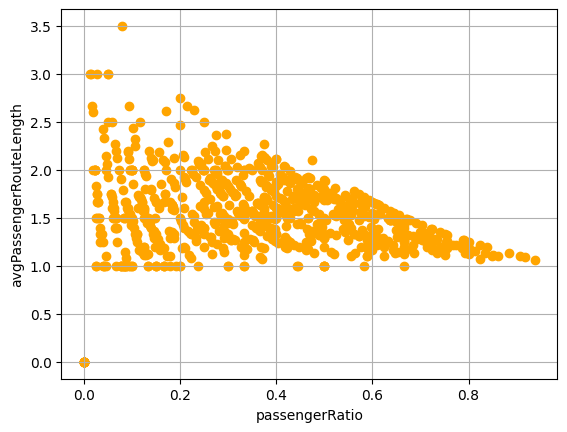

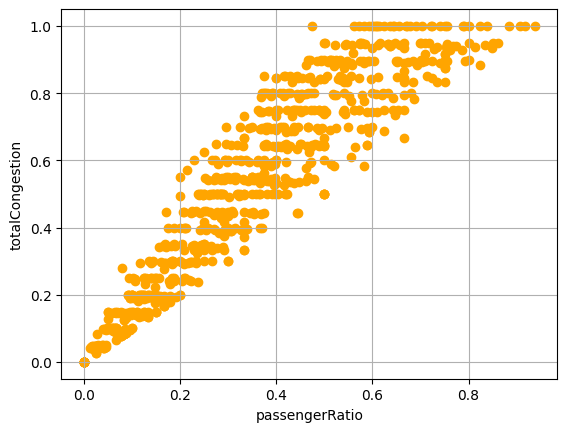

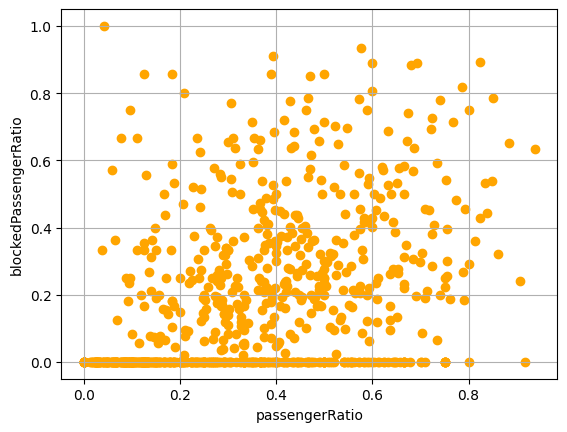

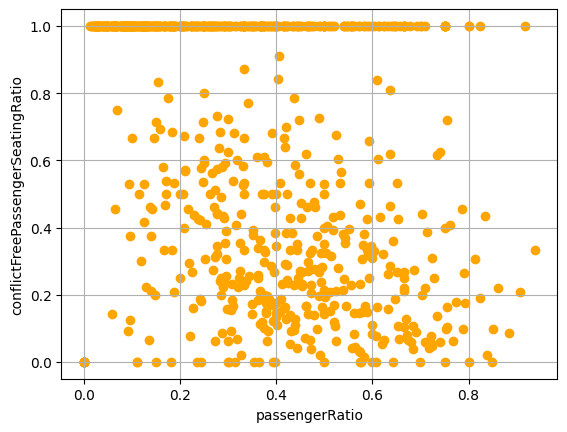

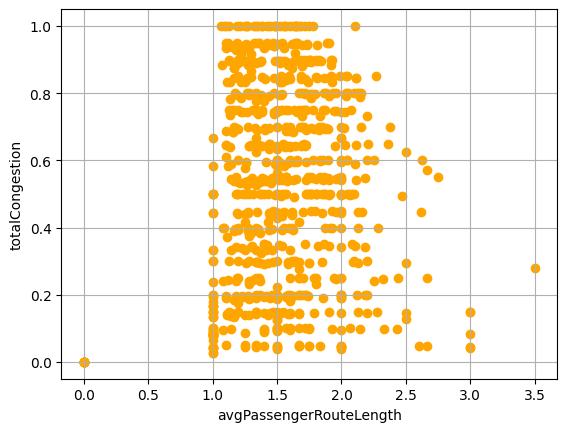

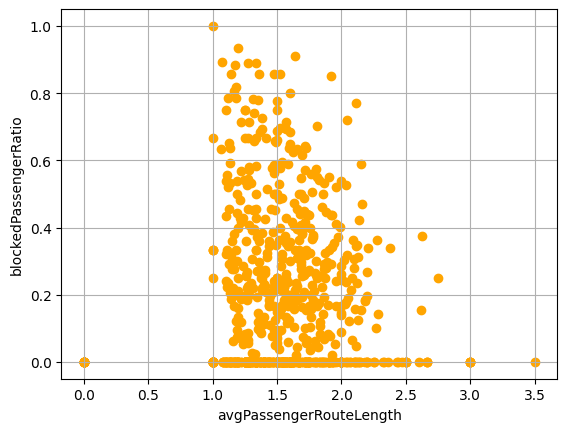

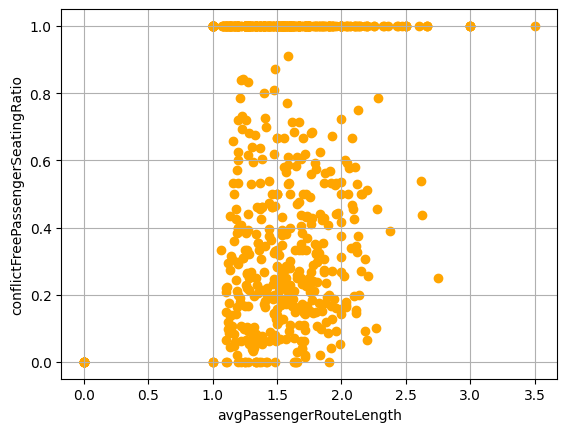

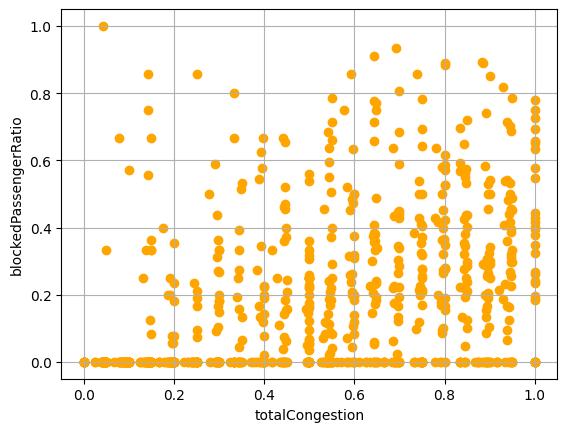

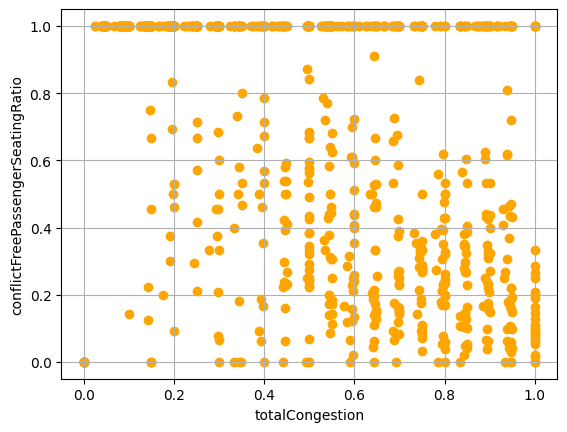

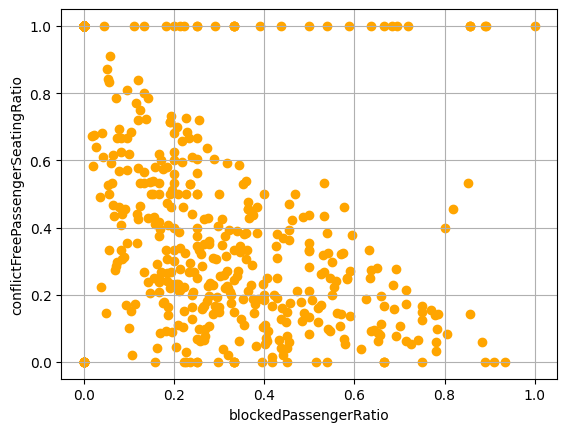

In [13]:
def plot_feature_combination(instances, feature_1, feature_2, colored_by_generator = False):
    if colored_by_generator:
        instances.sort(key = lambda x: x["source"])
        grouped_instances_by_source = itertools.groupby(instances, key= lambda x: x["source"])
        for key, group in grouped_instances_by_source:
            grouped_instances = list(group)
            x_coords = [instance["featureDescription"][feature_1] for instance in grouped_instances]
            y_coords = [instance["featureDescription"][feature_2] for instance in grouped_instances]
            plt.scatter(x_coords, y_coords, label=key, color=generator_colors[key])
    else:
        x_coords = [instance["featureDescription"][feature_1] for instance in instances]
        y_coords = [instance["featureDescription"][feature_2] for instance in instances]
        plt.scatter(x_coords, y_coords)

    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    
    plt.grid()
    plt.show()

experiment_id = "17-08-800small"
instances = list(problem_instances.find({"experimentId" : experiment_id}))
#feature_names = ["totalPassengerCount", "passengerRatio","avgPassengerRouteLength","stdDevRailCarriageCapacity", "totalCongestion", "blockedPassengerRatio", "conflictFreePassengerSeatingRatio"]
feature_names = ["passengerRatio","avgPassengerRouteLength", "totalCongestion", "blockedPassengerRatio", "conflictFreePassengerSeatingRatio"]
feature_combinations = list(itertools.combinations(feature_names, 2))

for combination in feature_combinations:
    plot_feature_combination(instances, combination[0], combination[1], colored_by_generator = True)